In [1]:
import csv
import numpy as np
testdata = []
traindata = []
trainlabel = []
with open('test.data.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        testdata.append(row)
with open('train.data.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        traindata.append(row)
        
with open('train.labels.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        trainlabel.append(row)
        
testdt = np.array(testdata[1:], dtype=float)
traindt = np.array(traindata[1:], dtype=float)
trainlb = np.array(trainlabel[1:], dtype=float).flatten()
print(testdt.shape)
print(traindt.shape)
print(trainlb.shape)

np.random.seed(5)

(15000, 128)
(15000, 128)
(15000,)


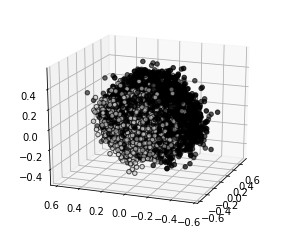

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
#%matplotlib notebook
%matplotlib inline

X = traindt
y = trainlb

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=-159)

plt.cla()
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral,
           edgecolor='k')

plt.show()
fig.savefig(os.path.join('./', 'features.pdf'), format="pdf", dpi=600)

In [3]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf", gamma=1.67, C=9.44, probability=True)
clf.fit(traindt, trainlb)

SVC(C=9.44, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.67, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [4]:
clf.predict(testdt)

array([0., 1., 0., ..., 1., 1., 1.])

In [5]:
prob_res = clf.predict_proba(testdt)
prob_1 = prob_res[:,1]

In [6]:
f = open("test.predict.csv", "w")
f.write("ID,ProbFemale\n")
for i in range(len(prob_1)):
    f.write(str(i+1) + "," + str(prob_1[i]) + "\n")
f.close()